In [41]:
#import necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
#Load dataset into pandas dataframe.
df=pd.read_excel("data/ECOMM DATA.xlsx")

df.head()   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [43]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


Total Sales 

In [66]:
#Total Sales 
total_sales = df['Sales'].sum().round(2)
print(f"Total sales : {total_sales}")


Total sales : 12642501.91


In [68]:
#Total Sales by Year 

df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# pandas display option to avoid scientific notation 
pd.options.display.float_format = '{:,.2f}'.format  # Change to 2 decimal places, using commas for thousands

print("Total Sales by Year:")
print(sales_by_year)

Total Sales by Year:
   Year        Sales
0  2011 2,259,450.90
1  2012 2,677,438.69
2  2013 3,405,746.45
3  2014 4,299,865.87


In [69]:
#Total sales by Year and Product 

# Extract the year
df['Year'] = df['Order Date'].dt.year

# Group by 'Year' and 'Product Name' to get total sales for each combination
sales_by_year_and_product = df.groupby(['Year', 'Product Name'])['Sales'].sum().reset_index()

# Sort by 'Year' and then 'Sales' for clarity
sales_by_year_and_product = sales_by_year_and_product.sort_values(by=['Year', 'Sales'], ascending=[True, False])

print("Total Sales by Year and Product:")
print(sales_by_year_and_product)
print(sales_by_year)

Total Sales by Year and Product:
       Year                                       Product Name     Sales
787    2011  Cisco TelePresence System EX90 Videoconferenci... 22,638.48
2406   2011                          Samsung Smart Phone, VoIP 16,330.16
2008   2011                       Nokia Smart Phone, Full Size 16,265.52
782    2011                  Cisco Smart Phone, with Caller ID 15,614.53
260    2011                       Apple Smart Phone, Full Size 14,986.25
...     ...                                                ...       ...
9753   2014      Avery Hidden Tab Dividers for Binding Systems      1.79
10249  2014                       Computer Printout Index Tabs      1.68
10596  2014  Eureka Disposable Bags for Sanitaire Vibra Gro...      1.62
12188  2014                   Self-Adhesive Ring Binder Labels      1.41
11082  2014       Hoover Commercial Lightweight Upright Vacuum      1.39

[12769 rows x 3 columns]
   Year        Sales
0  2011 2,259,450.90
1  2012 2,677,438.69
2 

Analyze Sales Trends Over Time

In [70]:
print(type(df['Order Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [75]:
# Sales Trends Based on Date 

order_sales_sum = df.groupby('Order Date')['Sales'].sum().reset_index()
order_sales_sum.head()

,Order Date,Sales
0,2011-01-01,808.56
1,2011-01-02,314.22
2,2011-01-03,"4,503.54"
3,2011-01-04,"2,808.87"
4,2011-01-05,"3,662.31"


In [76]:
print(type(order_sales_sum["Sales"]))

<class 'pandas.core.series.Series'>


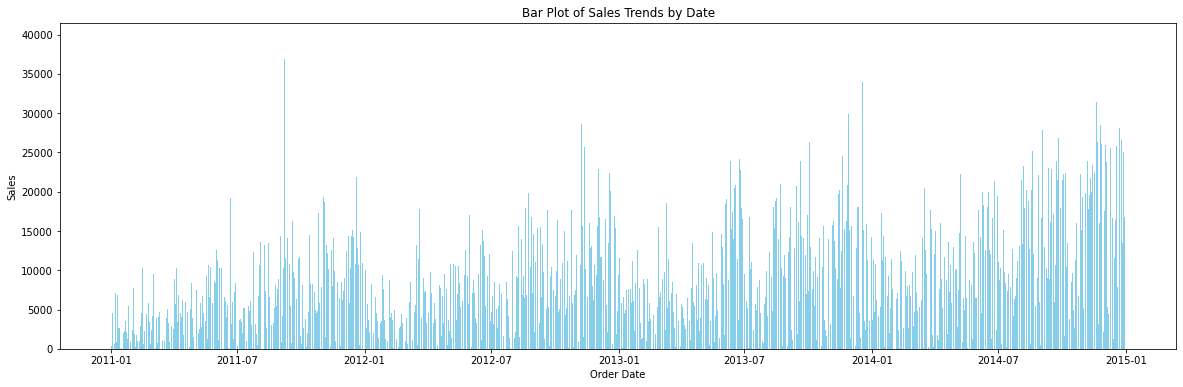

In [77]:
sales_timeline_fig = plt

sales_timeline_fig.figure(figsize=(20, 6))
sales_timeline_fig.bar(order_sales_sum['Order Date'], order_sales_sum['Sales'], color='skyblue')  # 'color' sets the bar color
sales_timeline_fig.title('Bar Plot of Sales Trends by Date')
sales_timeline_fig.xlabel('Order Date')
sales_timeline_fig.ylabel('Sales')
sales_timeline_fig.show()

In [79]:
#Sales Trends - Organizing by grouping into year and month

order_sales_sum['Year-Month'] = order_sales_sum['Order Date'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and sum 'Sales'
grouped_sales = order_sales_sum.groupby('Year-Month')['Sales'].sum().reset_index()

# Sort by 'Year-Month'
grouped_sales = grouped_sales.sort_values(by='Year-Month')

In [80]:
grouped_sales.head()

,Year-Month,Sales
0,2011-01,"98,898.49"
1,2011-02,"91,152.16"
2,2011-03,"145,729.37"
3,2011-04,"116,915.76"
4,2011-05,"146,747.84"


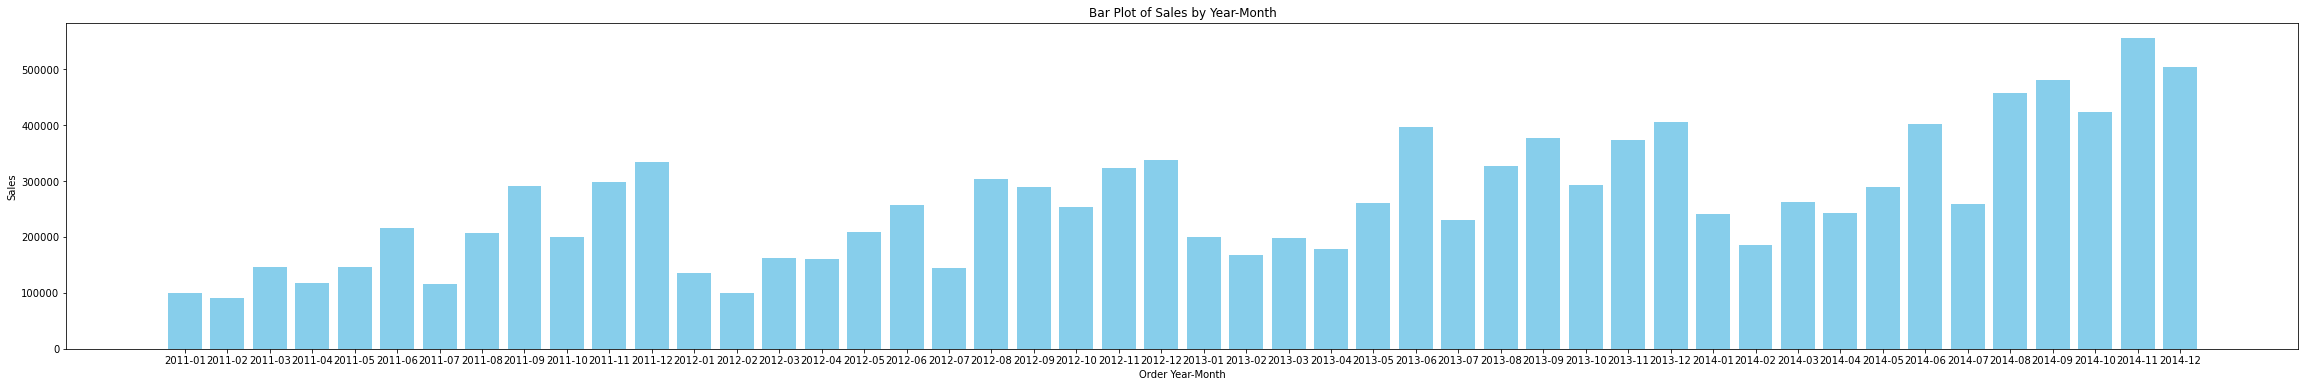

In [81]:
#Visualize grouped sales (Year-Month)

grouped_sales_timeline_fig = plt

grouped_sales_timeline_fig.figure(figsize=(40, 6))
grouped_sales_timeline_fig.bar(grouped_sales['Year-Month'], grouped_sales['Sales'], color='skyblue')  # 'color' sets the bar color
grouped_sales_timeline_fig.title('Bar Plot of Sales by Year-Month')
grouped_sales_timeline_fig.xlabel('Order Year-Month')
grouped_sales_timeline_fig.ylabel('Sales')
grouped_sales_timeline_fig.show()

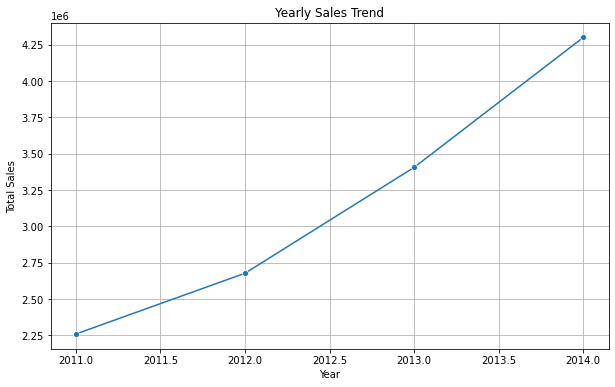

In [82]:
#Sales Trends BY Year 

# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by 'Year' and sum 'Sales'
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Line plot for yearly sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Sales', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Best selling Product

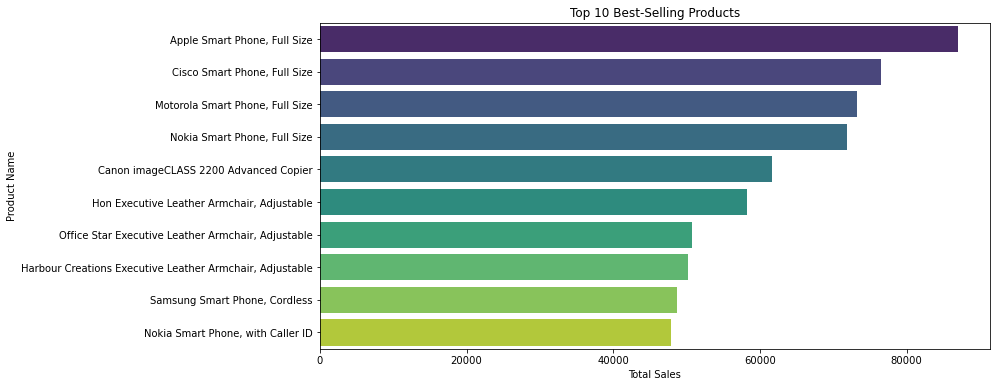

In [83]:
# Group by 'Product Name' and sum 'Sales'
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort by 'Sales' to find the best-selling products
best_selling_products = product_sales.sort_values(by='Sales', ascending=False)

# Bar plot for best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=best_selling_products.head(10), x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()